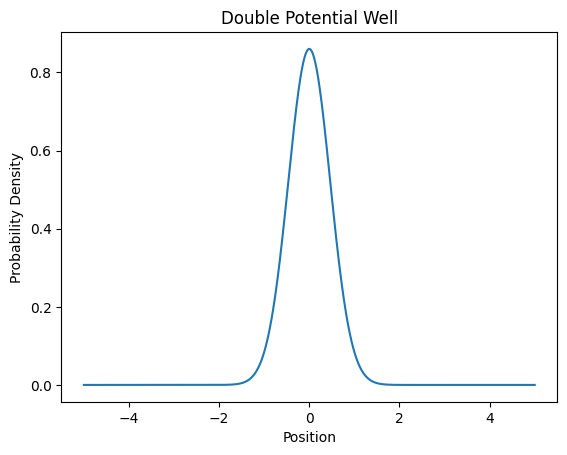

In [4]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Mass
C = 1.0
L = 10.0  # Length of the system
N = 1000  # Number of spatial grid points
dx = L / N  # Spatial step size
dt = 0.01  # Time step size
t_max = 10.0  # Maximum simulation time
x0 = 0.0  # Initial position

# Potential function
def potential(x, x0, C):
    return 0.5 * C * (np.abs(x) - x0)**2

# Initial wave function
def psi0(x, C, x0):
    w = (C/m)**0.5
    return (m * w / (np.pi * hbar))**0.25 * np.exp(-0.5 * m * w * (x - x0)**2 / hbar)

# Initialize spatial grid
x = np.linspace(-L / 2, L / 2, N)

# Initialize wave function
psi = psi0(x, C, x0)

# Initialize time
t = 0.0

# Main loop
while t < t_max:
    # Kinetic evolution
    psi = np.fft.ifft(np.exp(-0.5j * dt * (hbar / m) * (np.fft.fftfreq(N, dx) ** 2)) * np.fft.fft(psi))
    
    # Potential evolution
    psi *= np.exp(-1j * dt * potential(x, x0, C) / hbar)
    
    # Kinetic evolution
    psi = np.fft.ifft(np.exp(-0.5j * dt * (hbar / m) * (np.fft.fftfreq(N, dx) ** 2)) * np.fft.fft(psi))
    
    # Update time
    t += dt

# Plot the final wave function
plt.plot(x, np.abs(psi) ** 2)
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Double Potential Well')
plt.show()
